In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from keras.models import load_model
import yfinance as yf
yf.pdr_override()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.svm import SVR

In [2]:
# Set up End and Start times for data grab
end = "2020-12-30"
start ="2018-01-01"

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'NFLX', 'AMZN']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_list = [AAPL, GOOG, NFLX, AMZN]
stock_name = ["APPLE", "GOOGLE", "NETFLIX", "AMAZON",]

for stock, com_name in zip(stock_list, stock_name):
    stock["stock_name"] = com_name
    
df = pd.concat(stock_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,stock_name
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075409,102223600,APPLE
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068253,118071600,APPLE
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400,APPLE
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728756,94640000,APPLE
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573765,82271200,APPLE
...,...,...,...,...,...,...,...
2020-12-22,3202.840088,3222.000000,3180.080078,3206.520020,3206.520020,2369400,AMAZON
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800,AMAZON
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,AMAZON


In [ ]:
#Check Data null
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
stock_name    0
dtype: int64

In [ ]:
#check data NaN
df.isna().any()

Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
stock_name    False
dtype: bool

In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,64.715590,65.502619,63.973070,64.774042,63.386317,1.353838e+08
std,25.530466,25.926881,25.051341,25.509339,25.655103,6.112212e+07
min,35.994999,36.430000,35.500000,35.547501,34.414238,4.544800e+07
25%,46.520626,46.866874,46.174999,46.516875,44.832863,9.309570e+07
50%,54.039999,54.740000,53.270000,53.868752,52.152166,1.210796e+08
75%,76.709999,77.858747,76.005001,77.342503,76.021801,1.614616e+08
max,138.050003,138.789993,134.339996,136.690002,135.480591,4.265100e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2018-01-02 to 2020-12-29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        754 non-null    float64
 1   High        754 non-null    float64
 2   Low         754 non-null    float64
 3   Close       754 non-null    float64
 4   Adj Close   754 non-null    float64
 5   Volume      754 non-null    int64  
 6   stock_name  754 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


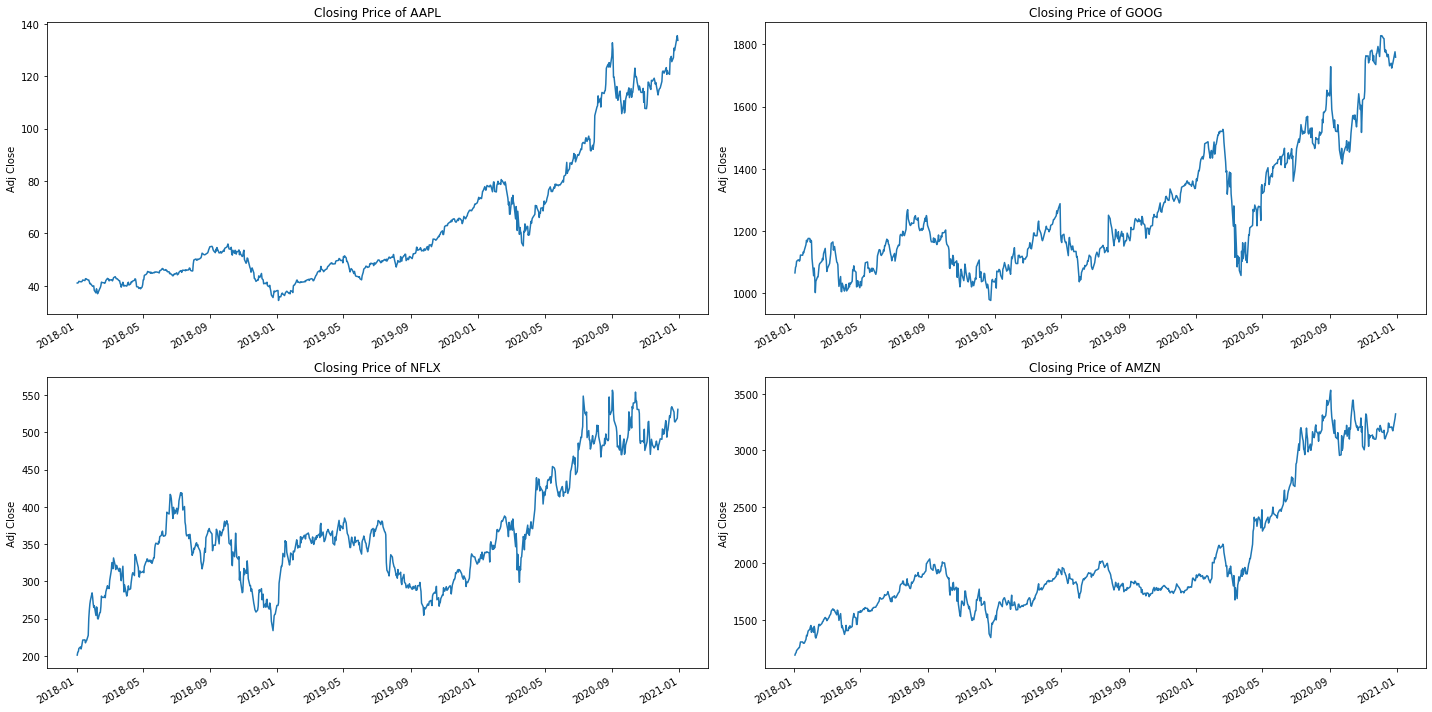

In [ ]:
# closing price
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

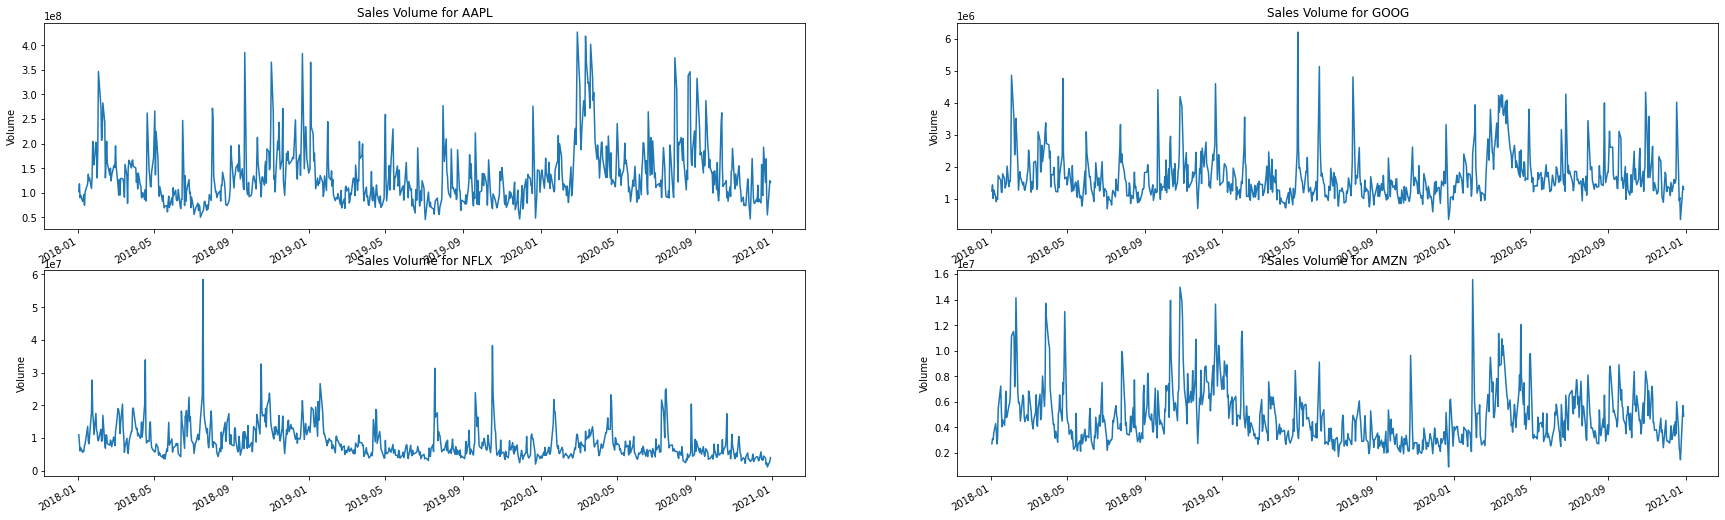

In [ ]:
# Volume
plt.figure(figsize=(30, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, stock in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    stock['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.show()

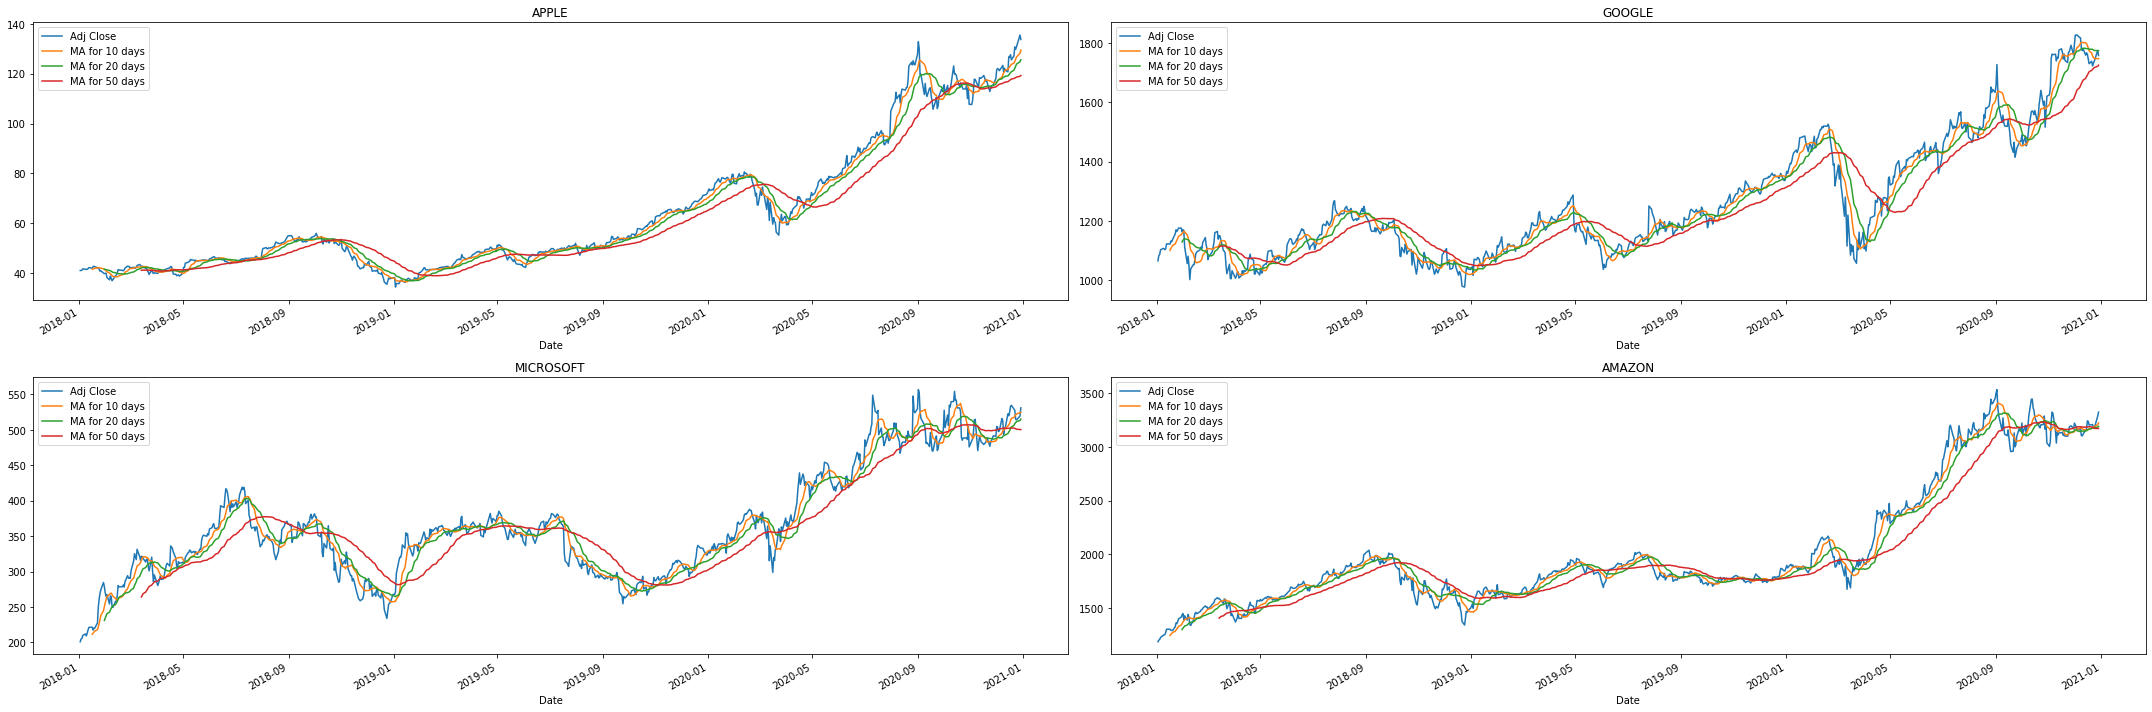

In [ ]:
#moving average of the stocks
ma_day = [10, 20, 50]
for ma in ma_day:
    for stock in stock_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(30)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
# Choose potential stock code
df = pdr.get_data_yahoo(tech_list, start=start, end=end)
df = df["Adj Close"]
df

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-02,41.075401,1189.010010,1065.000000,201.070007
2018-01-03,41.068253,1204.199951,1082.479980,205.050003
2018-01-04,41.259014,1209.589966,1086.400024,205.630005
2018-01-05,41.728764,1229.140015,1102.229980,209.990005
2018-01-08,41.573765,1246.869995,1106.939941,212.050003
...,...,...,...,...
2020-12-22,130.713135,3206.520020,1723.500000,527.330017
2020-12-23,129.801270,3185.270020,1732.380005,514.479980
2020-12-24,130.802338,3172.689941,1738.849976,513.969971


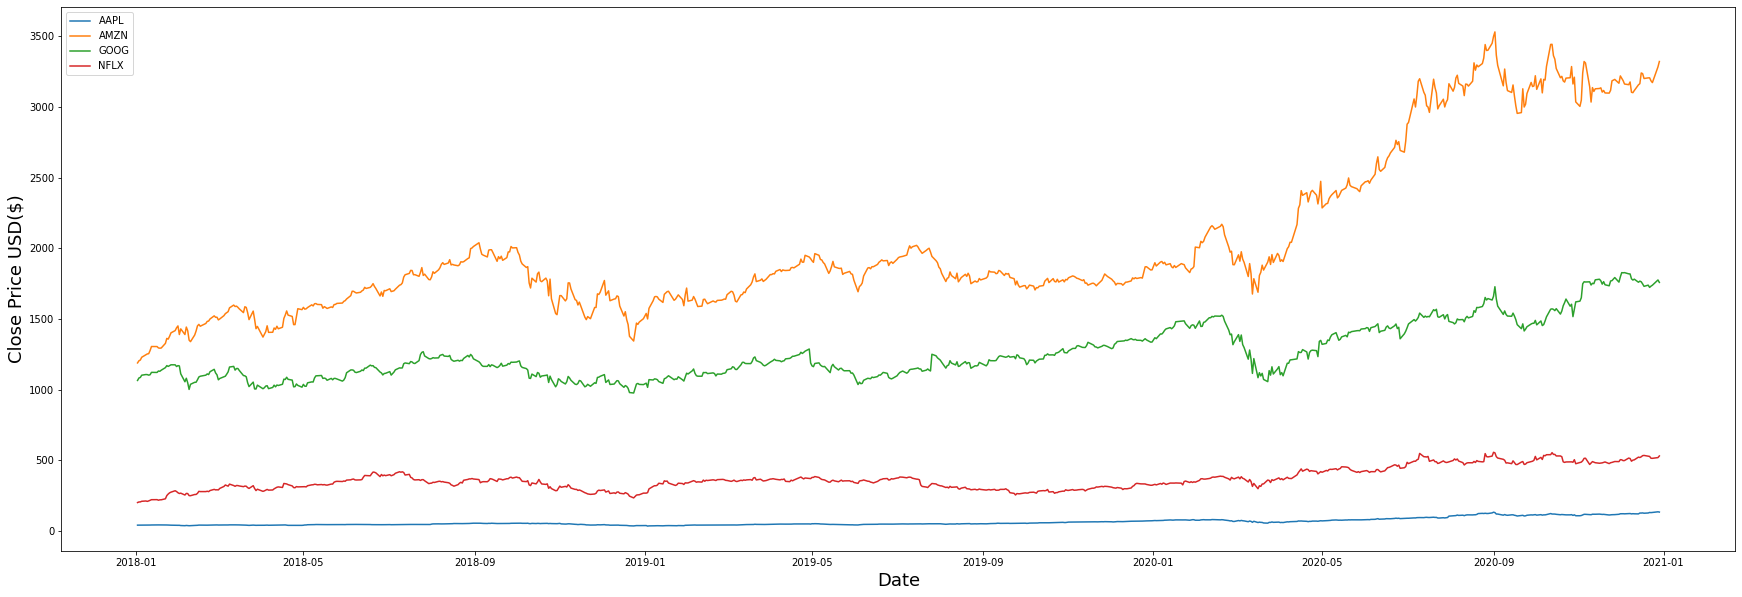

In [ ]:

my_stocks=df
plt.figure(figsize=(30,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
#Calculate the percent
my_stocks = df
daily_simple_returns=my_stocks.pct_change(1)
daily_simple_returns.dropna()

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2018-01-03,-0.000174,0.012775,0.016413,0.019794
2018-01-04,0.004645,0.004476,0.003621,0.002829
2018-01-05,0.011385,0.016163,0.014571,0.021203
2018-01-08,-0.003714,0.014425,0.004273,0.009810
2018-01-09,-0.000115,0.004676,-0.000614,-0.012922
...,...,...,...,...
2020-12-22,0.028464,0.000106,-0.009124,-0.002987
2020-12-23,-0.006976,-0.006627,0.005152,-0.024368
2020-12-24,0.007712,-0.003949,0.003735,-0.000991


In [ ]:
#Exception
#Show the stock correlation
corr=daily_simple_returns.corr()
corr

,AAPL,AMZN,GOOG,NFLX
AAPL,1.000000,0.655102,0.694943,0.507702
AMZN,0.655102,1.000000,0.685708,0.671134
GOOG,0.694943,0.685708,1.000000,0.545803
NFLX,0.507702,0.671134,0.545803,1.000000


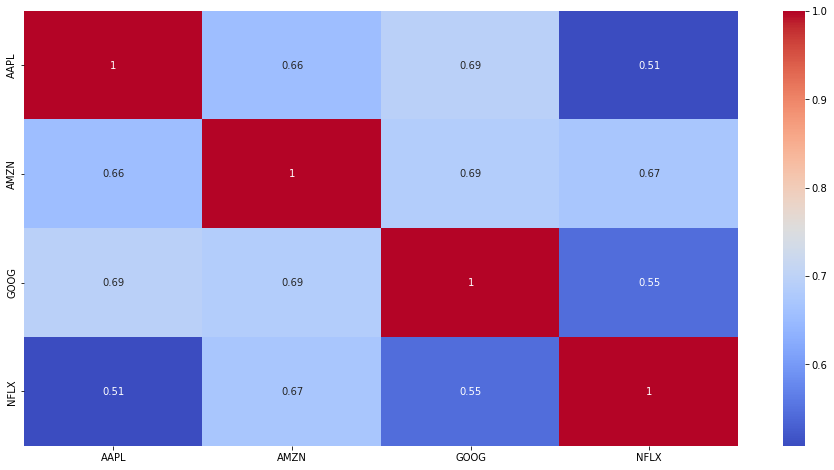

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
#Exception
#Show The covariance matrix for simple returns
cov=daily_simple_returns.cov()
cov

,AAPL,AMZN,GOOG,NFLX
AAPL,0.000490,0.000304,0.000299,0.000302
AMZN,0.000304,0.000439,0.000279,0.000378
GOOG,0.000299,0.000279,0.000377,0.000285
NFLX,0.000302,0.000378,0.000285,0.000723


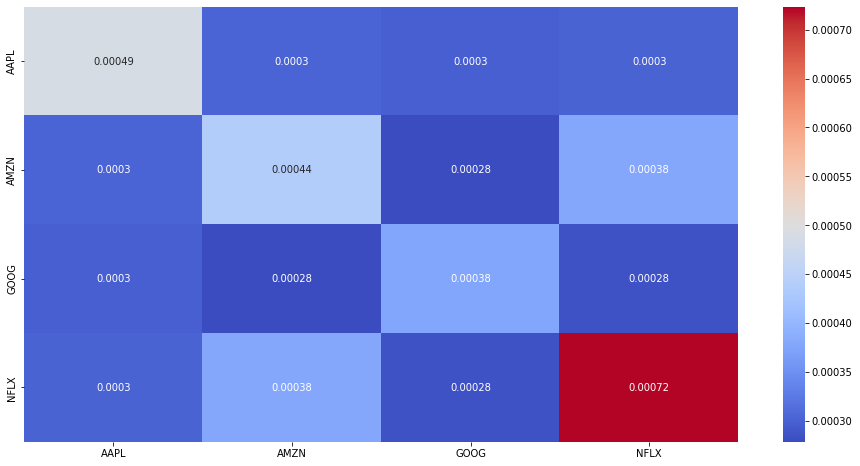

In [ ]:
#Exception
plt.figure(figsize=(16, 8))
sns.heatmap(cov, annot=True, cmap='coolwarm')

In [ ]:
#Exception
#Show the variance
var=daily_simple_returns.var()
var

AAPL    0.000490
AMZN    0.000439
GOOG    0.000377
NFLX    0.000723
dtype: float64

In [ ]:
#Exception
#Print the standard deviation for daily simple returns
std = daily_simple_returns.std()
std

AAPL    0.022136
AMZN    0.020942
GOOG    0.019406
NFLX    0.026893
dtype: float64

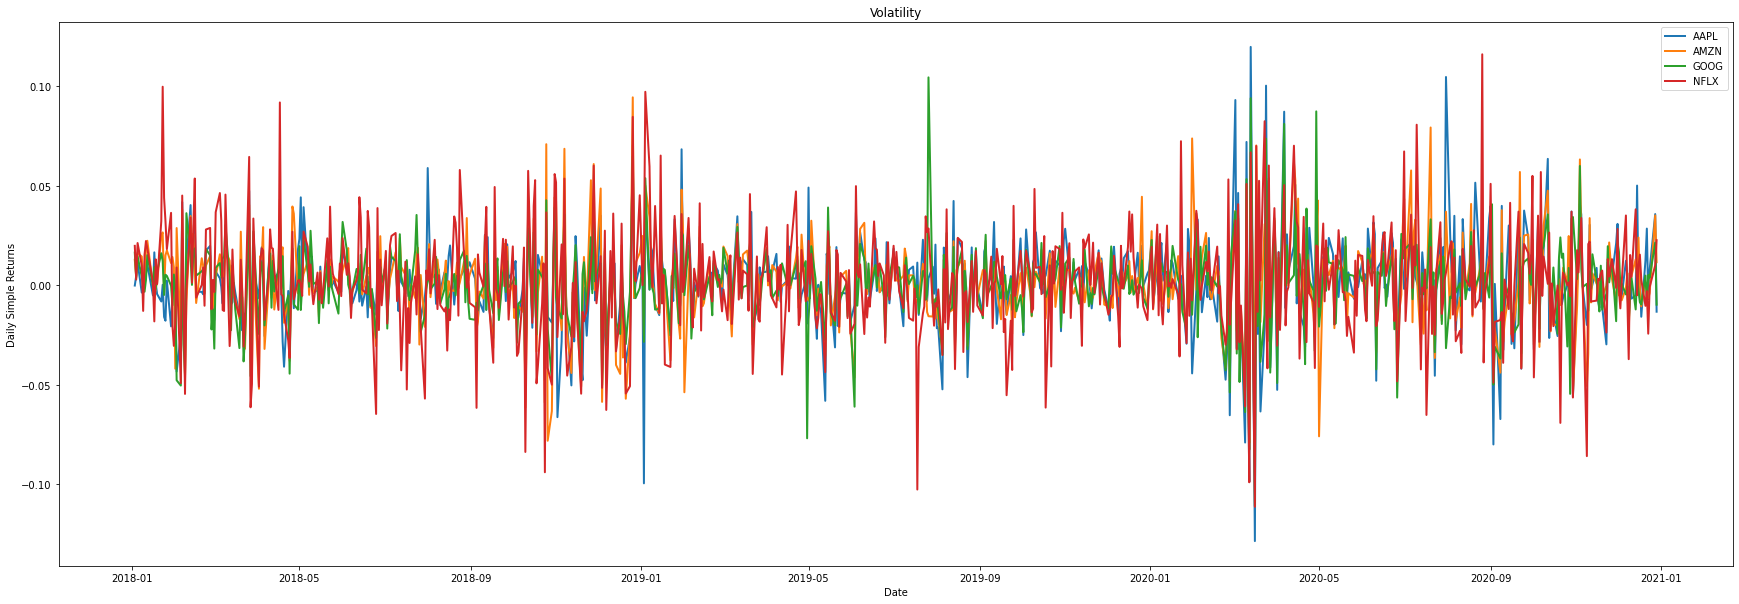

In [ ]:
#Volatility
plt.figure(figsize=(30,10))
for i in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[i],lw=2,label=i)
plt.legend(loc='upper right',fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

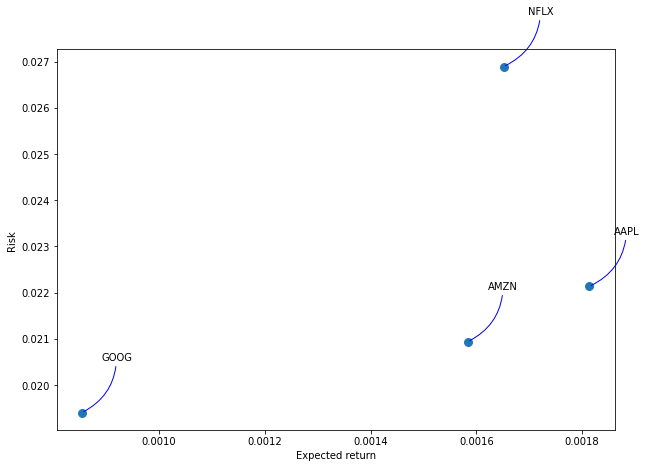

In [ ]:
#Risk and daily mean simple return
rets = daily_simple_returns.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.show()

[*********************100%***********************]  1 of 1 completed


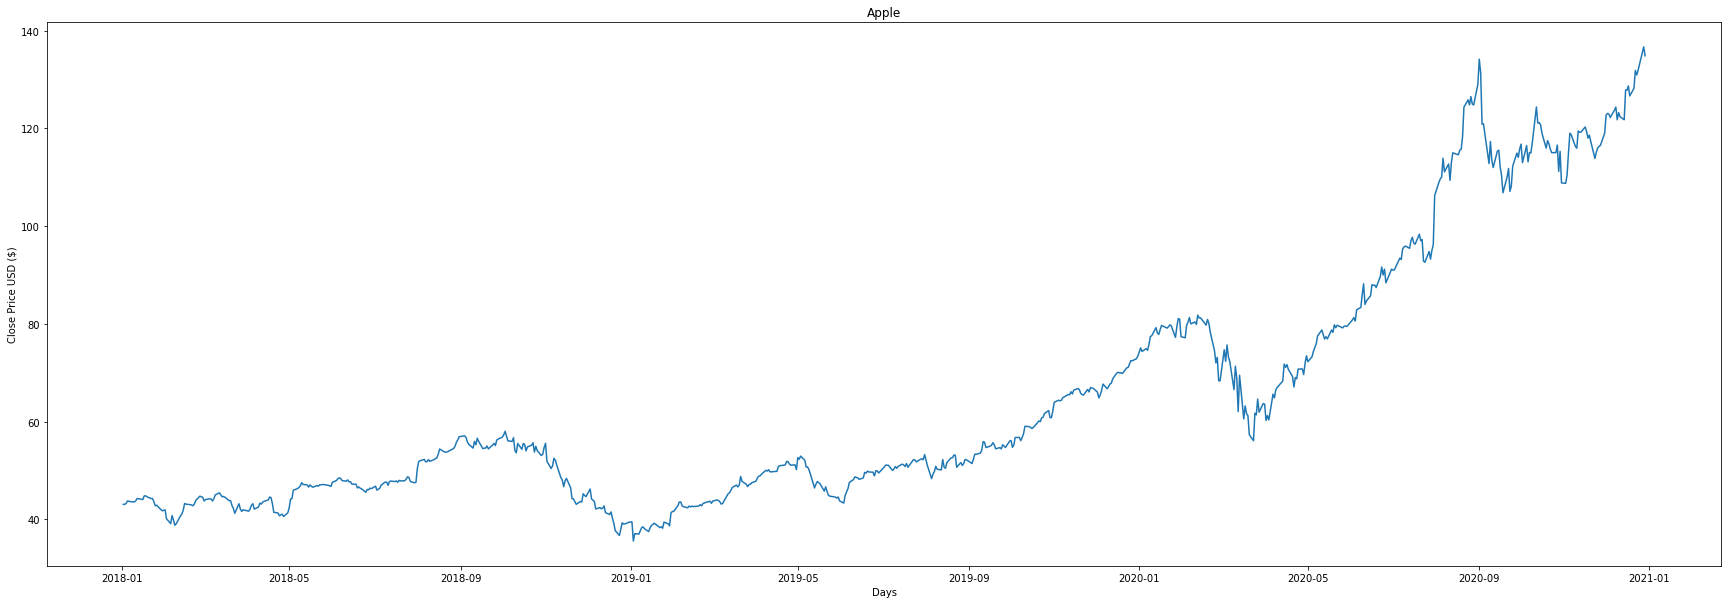

In [4]:
#Predict
stock_selected = pdr.get_data_yahoo("AAPL", start=start, end=end)
# stock_selected.dropna()
stock_selected.shape
# Visualizing the close prices of the data.
plt.figure(figsize=(30,10))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_selected['Close'])
plt.show()

In [5]:
stock_selected = pdr.get_data_yahoo("AAPL", start=start, end=end)
stock_selected = stock_selected["Close"]
stock_selected = pd.DataFrame(stock_selected)
stock_selected

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502
...,...
2020-12-22,131.880005
2020-12-23,130.960007
2020-12-24,131.970001


In [6]:
# Prediction 100 days into the future.
future_days = 10
stock_selected['Prediction'] = stock_selected.shift(-future_days)
stock_selected

,Close,Prediction
Date,,
2018-01-02,43.064999,44.775002
2018-01-03,43.057499,44.814999
2018-01-04,43.257500,44.615002
2018-01-05,43.750000,44.250000
2018-01-08,43.587502,44.259998
...,...,...
2020-12-22,131.880005,NaN
2020-12-23,130.960007,NaN
2020-12-24,131.970001,NaN


In [7]:
#Create the independent data set (X)
x = np.array(stock_selected.drop(['Prediction'], 1))[:-future_days]
y = np.array(stock_selected['Prediction'])[:-future_days]

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\702053708.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(stock_selected.drop(['Prediction'], 1))[:-future_days]


In [8]:
print(len(x))
print(len(y))

744
744


In [9]:
#Split the data in to 80% training data set and a 20% testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
#Use RandomForestRegressor for the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=2,random_state=587)
forest.fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.9600284228375837


In [11]:
#Show how close predicted values and the actual values are
forest_prediction = forest.predict(x_test)
#Show result predicts
print(forest_prediction)

[ 55.10499954  56.43500137  38.32500076  56.07249832  51.86750031
  67.20375061  39.10250092  44.94187546  70.69999695  67.20375061
  64.03874969  50.00500107  44.05250168 119.05000305  48.8275013
  55.41499901  74.94999695  47.67499924  62.22375107 105.45124817
  46.63249969 118.18000031  42.54499817  50.80749893  66.95999908
  51.47125053  46.04000092  80.90499878 115.01000214  44.24499893
 127.80999756  54.58250046  47.14500046  72.56624985  41.96250153
  79.80750275  49.78499985  49.52874947  48.33499908  53.98374939
  43.125      106.83999634  42.35749817  50.97875023  50.78250122
  51.40625     55.80500031  50.64749908  93.33874893 122.41000366
  49.78499985  42.96250153  74.04874802  58.83000183  42.15750122
  53.98374939  87.89749908  82.875       44.94187546  48.37749863
  54.05750084  47.88624954 120.70999908 111.71999741  79.18250275
  38.57499886  79.42500305  87.89749908 116.59500122  55.94250107
  68.78749847  66.98625183  56.78374863 112.72000122  90.93500137
  51.471250

In [12]:
#Show actual values
print(y_test)

[ 55.20500183  55.54750061  39.20500183  56.90750122  53.87250137
  66.07250214  44.45999908  48.18500137  66.51750183  66.59249878
  69.23249817  50.31000137  43.22750092 116.02999878  53.54249954
  55.52750015  75.08750153  48.32749939  54.82749939 111.11250305
  41.31499863 108.76999664  46.29000092  50.96500015  67.69249725
  47.16500092  47.90250015  83.36499786 106.26000214  52.9375
 128.69999695  55.55500031  47.80749893  67.86499786  43.68249893
  78.80999756  52.26750183  45.54249954  53.76250076  55.17499924
  43.75749969 115.31999969  38.07249832  51.05749893  48.92250061
  48.25        54.74000168  49.29499817  90.01499939 115.97000122
  47.18500137  44.74250031  78.16999817  53.61249924  47.04000092
  50.18000031  78.26249695  85.99749756  46.52999878  52.21749878
  57.52249908  47.58750153 114.94999695 111.19999695  80.83499908
  37.6875      60.55250168  68.37999725 121.77999878  58.81999969
  64.86250305  64.61000061  55.96250153 116.97000122  91.63249969
  44.91500092 

In [13]:
#Get the validate data for the model
#Create a variable to store all of the rows in the data set except the last n rows
temp_stock_select = stock_selected[:-future_days]
#Create a variable to store the independent price value
# x_future = temp_stock_select.tail(future_days)['Close']
x_future = list()
for vl in  temp_stock_select.tail(future_days)['Close']:
    x_future.append([vl])
x_future

[[122.72000122070312],
 [123.08000183105469],
 [122.94000244140625],
 [122.25],
 [123.75],
 [124.37999725341797],
 [121.77999877929688],
 [123.23999786376953],
 [122.41000366210938],
 [121.77999877929688]]

In [14]:
forest_prediction = forest.predict(x_future)
#Print the price for the next n days
print('Price of AAPL in ',future_days,'days in predicted to be', forest_prediction)

Price of AAPL in  10 days in predicted to be [132.28499985 127.80999756 127.80999756 130.76499939 128.22999573
 119.13999939 133.89249802 127.80999756 132.28499985 133.89249802]


In [16]:
#Print the actual price for the next n days
print('Actual price of AAPL in ',future_days,'days to be', temp_stock_select.tail(future_days)['Prediction'])

Actual price of AAPL in  10 days to be Date
2020-12-01    127.879997
2020-12-02    127.809998
2020-12-03    128.699997
2020-12-04    126.660004
2020-12-07    128.229996
2020-12-08    131.880005
2020-12-09    130.960007
2020-12-10    131.970001
2020-12-11    136.690002
2020-12-14    134.869995
Name: Prediction, dtype: float64


In [18]:
stock_selected[x.shape[0]:]

,Close,Prediction
Date,,
2020-12-15,127.879997,NaN
2020-12-16,127.809998,NaN
2020-12-17,128.699997,NaN
2020-12-18,126.660004,NaN
2020-12-21,128.229996,NaN
2020-12-22,131.880005,NaN
2020-12-23,130.960007,NaN
2020-12-24,131.970001,NaN
2020-12-28,136.690002,NaN


In [20]:
valid['Prediction'] = predictions
valid

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\1849981054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


,Close,Prediction,Predictions
Date,,,
2020-12-15,127.879997,132.285000,132.285000
2020-12-16,127.809998,127.809998,127.809998
2020-12-17,128.699997,127.809998,127.809998
2020-12-18,126.660004,130.764999,130.764999
2020-12-21,128.229996,128.229996,128.229996
2020-12-22,131.880005,119.139999,119.139999
2020-12-23,130.960007,133.892498,133.892498
2020-12-24,131.970001,127.809998,127.809998
2020-12-28,136.690002,132.285000,132.285000


C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\3133560815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


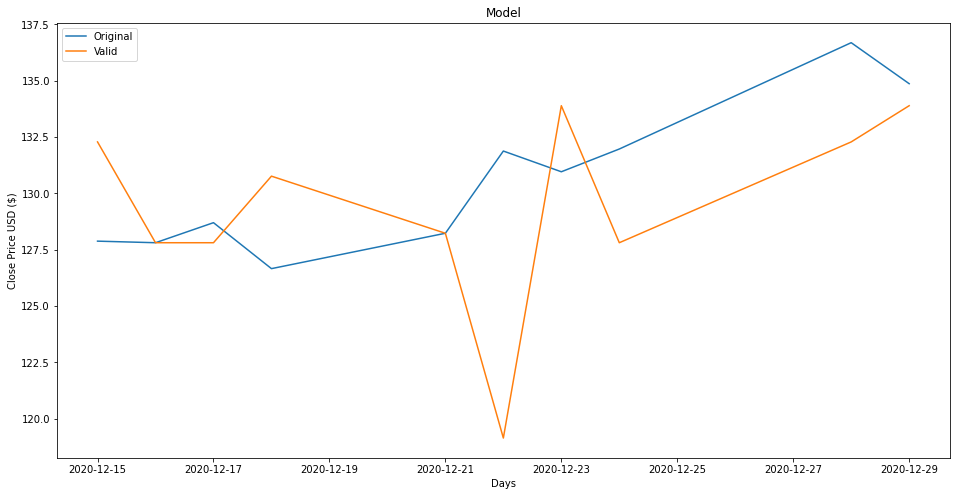

In [21]:
#Show plot Forest
predictions = forest_prediction 
valid = stock_selected[x.shape[0]:]
valid['Predictions'] = predictions
tree_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
# plt.plot(x_train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [22]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid['Close']- valid['Predictions']) ** 2)))
rmse

4.956002025814807

In [23]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
lr = LinearRegression()
lr.fit(x_train, y_train)
x_future = stock_selected.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\2961941392.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = stock_selected.drop(['Prediction'], 1)[:-future_days]


In [24]:
#Predict Tree
tree_prediction = tree.predict(x_future)
tree_prediction

c:\Users\Huu Tai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([127.87999725, 127.80999756, 127.80999756, 126.66000366,
       128.22999573, 131.88000488, 132.91500092, 131.97000122,
       136.69000244, 132.91500092])

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\2014711544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


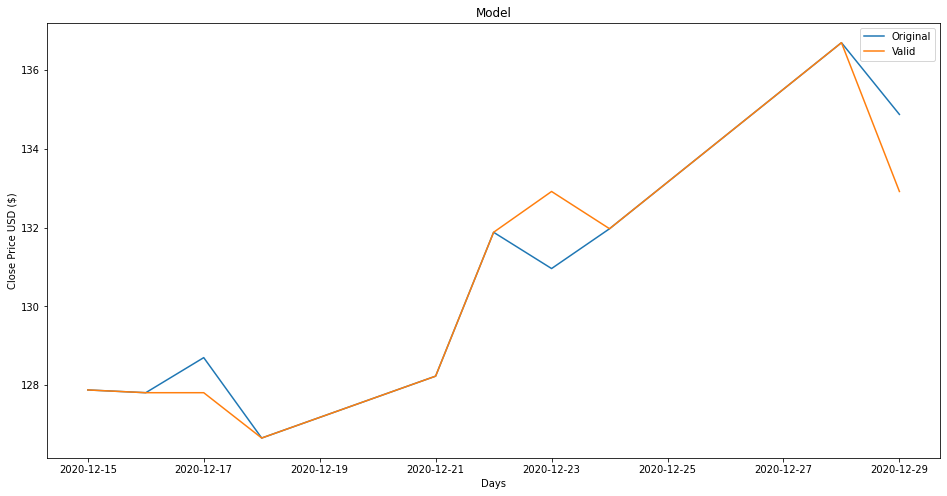

In [26]:
#Show plot Tree
predictions = tree_prediction 
valid = stock_selected[x.shape[0]:]
valid['Prediction'] = predictions
tree_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Close', 'Prediction']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [28]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid['Close']- valid['Prediction']) ** 2)))
rmse

0.9184826384109965

In [29]:
print(tree.score(x_test,y_test))

0.9549413556580608


In [30]:
#Predict Linear
lr_prediction = lr.predict(x_future)
lr_prediction

c:\Users\Huu Tai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([126.21722889, 126.59101188, 126.4456527 , 125.72923399,
       127.28666047, 127.94077674, 125.24123909, 126.75713325,
       125.89536328, 125.24123909])

C:\Users\Huu Tai\AppData\Local\Temp\ipykernel_25052\1771772586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


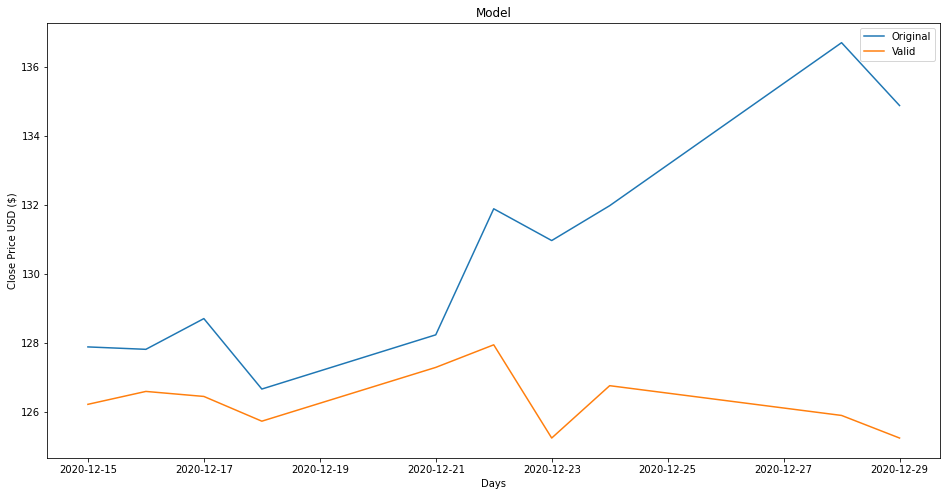

In [31]:
#Show plot linear
predictions = lr_prediction 
valid = stock_selected[x.shape[0]:]
valid['Predictions'] = predictions
linear_fig = plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [34]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid['Close']- valid['Predictions']) ** 2)))
rmse

5.438032708845363

In [33]:
print(lr.score(x_test,y_test))

0.9521535258757087


In [35]:
stock_selected2 =  pdr.get_data_yahoo('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [36]:
# Create a new dataframe with only the 'Close column 
data = stock_selected2.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8 ))
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [37]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08965075, 0.08604196, 0.08614082,
       0.07917047, 0.0714833 , 0.07247199, 0.06369727, 0.06125021,
       0.0623872 , 0.06325233, 0.04525792, 0.03534618, 0.05151147,
       0.04288502, 0.03203399, 0.03514843, 0.05072053, 0.05474947,
       0.0622389 , 0.07613022, 0.074746  , 0.07331241, 0.07138444,
       0.07491904, 0.08233432, 0.09091133, 0.08947771, 0.08881032,
       0.08109844, 0.08408929, 0.08559706, 0.08522628, 0.08117259,
       0.08589366, 0.0934078 , 0.09770867, 0.09338309, 0.0896013 ,
       0.09012035, 0.08856317, 0.08183998, 0.08169168, 0.07187879,
       0.06589713, 0.05623254, 0.07558643, 0.06463651, 0.06003904])]
[0.06325233179577505]

[array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08

In [38]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 13ms/step


In [39]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.420217082311234

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


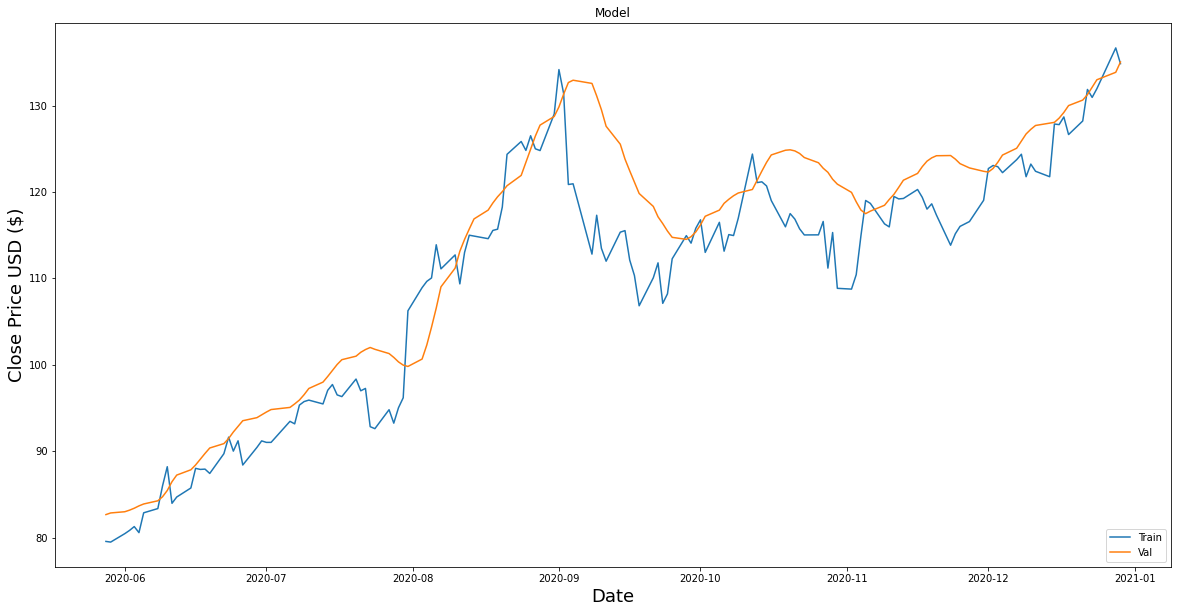

In [ ]:
# Plot the data LSTM Model
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid['Close']- valid['Predictions']) ** 2)))
rmse

5.438032708845363

In [ ]:
#Predict Value using LSTM Model
valid

,Close,Predictions
Date,,
2020-05-28,79.562500,82.668076
2020-05-29,79.485001,82.858040
2020-06-01,80.462502,82.999161
2020-06-02,80.834999,83.180939
2020-06-03,81.279999,83.404564
...,...,...
2020-12-22,131.880005,131.279434
2020-12-23,130.960007,132.149796
2020-12-24,131.970001,133.002869


In [ ]:
#Predct using SVR
days = list()
close_prices = list()
user_input_2 ='AAPL'
df2 = pdr.get_data_yahoo(user_input_2, start=start, end=end)
#Show data from 01-30 month 12 2020
df2


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.075401,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.068249,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.259010,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.728756,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.573761,82271200
...,...,...,...,...,...,...
2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100


In [ ]:
#Show the data set
df2.head()
df2.tail()
#Get 100 days
df_train = df2.tail(100)
df_test = df_train.tail(1)
df_train = df_train.head(99)
df2 = df2.reset_index()
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df2.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume
654,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939713,198045600
655,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537659,212403600
656,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220558,187902400
657,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817177,165598000
658,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796066,210082000
...,...,...,...,...,...,...,...
749,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
750,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200


In [ ]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-07,113.205002,113.675003,110.292503,111.112503,109.939713,198045600
1,2020-08-10,112.599998,113.775002,110.000000,112.727501,111.537659,212403600
2,2020-08-11,111.970001,112.482498,109.107498,109.375000,108.220558,187902400
3,2020-08-12,110.497498,113.275002,110.297501,113.010002,111.817177,165598000
4,2020-08-13,114.430000,116.042503,113.927498,115.010002,113.796066,210082000
...,...,...,...,...,...,...,...
94,2020-12-21,125.019997,128.309998,123.449997,128.229996,127.095421,121251600
95,2020-12-22,131.610001,134.410004,129.649994,131.880005,130.713135,168904800
96,2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801285,88223700
97,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100


In [ ]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676666,121047300


In [ ]:
days = list()             
close_prices = list()
#Get only the dates and the adjusted close prices
df_days = df_train.loc[:, 'Date']
df_close = df_train.loc[:, 'Close']

In [ ]:
#Create the independent data set (days)
for i in range(len(df_days)):
  days.append([i+1])
#Create the dependent data set (adj close prices)
for close_price in df_close:
  close_prices.append(float(close_price))

In [ ]:
#Create 3 models linear, poly, rbf
from sklearn.svm import SVR
lin_svr = SVR(kernel='linear', C= 1000.0)
lin_svr.fit(days, close_prices)

poly_svr = SVR(kernel='poly', C= 1000.0, degree=2)
poly_svr.fit(days, close_prices)

rbf_svr = SVR(kernel='rbf', C= 1000.0, gamma=0.85)
rbf_svr.fit(days, close_prices)

SVR(C=1000.0, gamma=0.85)

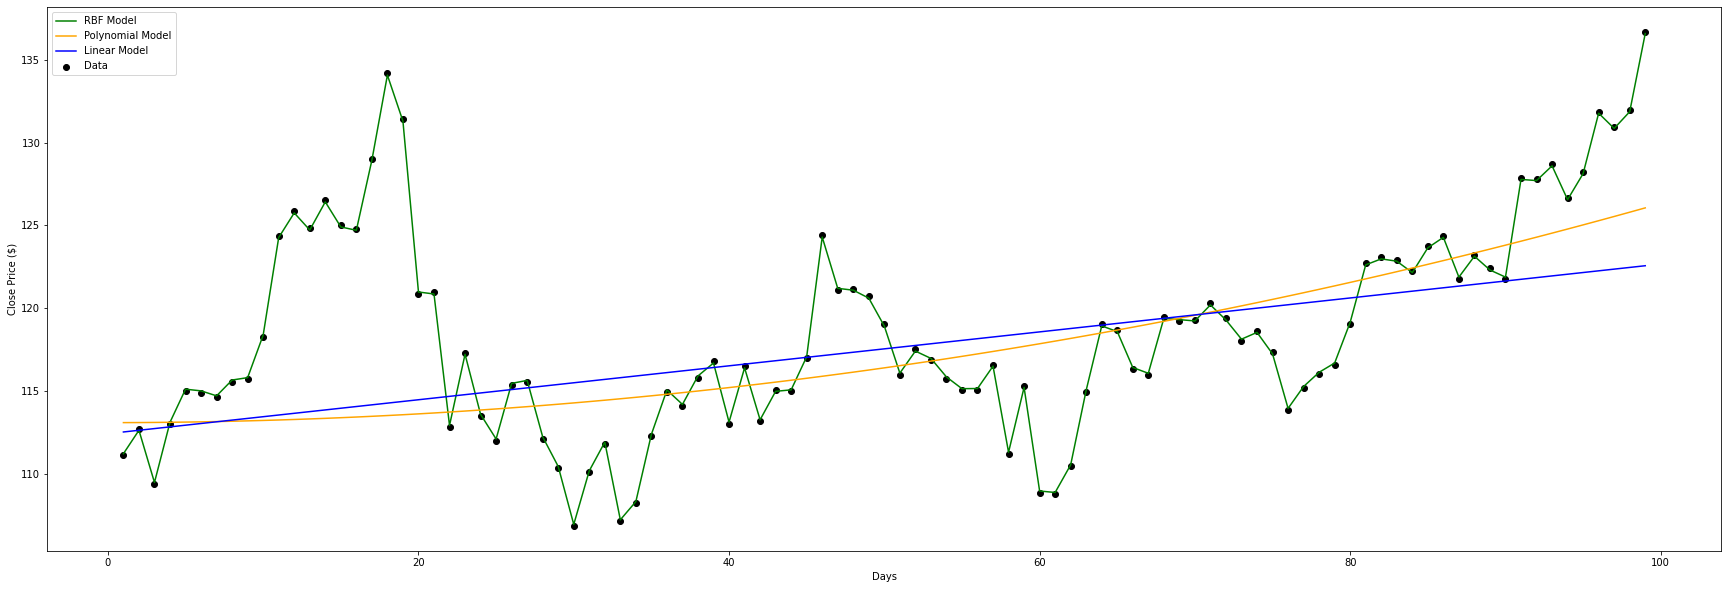

In [ ]:
#Plot the models
plt.figure(figsize=(30,10))
plt.scatter(days, close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

In [ ]:
arr_days_predict = list()
number_days_input = 1
for i in range(number_days_input):
  arr_days_predict.append([i+1+len(days)])

In [ ]:
arr_days_predict

[[100]]

In [ ]:
for vl in df_test["Close"]:
  print(vl)

134.8699951171875


In [ ]:
for vl in rbf_svr.predict(arr_days_predict):
  print(vl)

125.72439621396211


In [ ]:
for vl in lin_svr.predict(arr_days_predict):
  print(vl)

122.6687842413121


In [ ]:
for vl in poly_svr.predict(arr_days_predict):
  print(vl)

126.32371298863572
